***
# Projeto de Machine Learning
***
https://www.kaggle.com/harlfoxem/housesalesprediction

### Importação

In [29]:
import pandas as pd
import numpy as np
from sklearn import linear_model as lm
import matplotlib.pyplot as plt
import seaborn as sns

### Carregando os dados

In [5]:
df_raw = pd.read_csv('kc_house_data.csv')
df_raw

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### Preparando os dados

In [6]:
#Features
x_train = df_raw.drop(['price','date'], axis=1)

#Variaveis de resposta
y_train = df_raw['price'].copy()

In [7]:
y_train.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

### Modelo de Treino

In [8]:
#Modelo de Regressão Linear
model_lr = lm.LinearRegression()

#Modelo de treinamento
model_lr.fit(x_train,y_train)

LinearRegression()

In [9]:
pred = model_lr.predict(x_train)
pred[0:50]

array([ 205766.26460944,  731219.64982983,  379097.88265399,
        457424.13432517,  444789.05471807, 1451676.80046375,
        277965.14285806,  135261.77208372,  329843.8162438 ,
        250731.25050356,  870212.8814187 ,  437789.72121264,
        600311.43498104,  316903.13655569,  611557.85739085,
        944453.29692609,  456573.68626302,  539004.69481014,
        335024.2562983 ,  210585.07434918,  466088.95603607,
       1116489.11078686,  330386.45026617,  130784.11743744,
        545423.99906282,  310538.26026989,  802018.13764881,
        651875.20382812,  457699.20615283,  650018.45024565,
        541202.92170074,  332196.71884786,  655096.04733193,
        555240.33756517,  319817.17474386,  804301.35470874,
        201145.17195296,  861533.54324495,  103130.75983513,
        585745.32147531,  664511.50307338,  742662.60624436,
        863042.39845919,  508391.02023401,  153710.0804733 ,
        811721.66516476,   32096.77784432,  762323.19584888,
        417855.61065248,

### Performance metrics

In [10]:
df1 = df_raw.copy()

In [11]:
df1['prediction'] = pred

In [12]:
df1[['id','price','prediction']].head(6)

,id,price,prediction
0,7129300520,221900.0,2.057663e+05
1,6414100192,538000.0,7.312196e+05
2,5631500400,180000.0,3.790979e+05
3,2487200875,604000.0,4.574241e+05
4,1954400510,510000.0,4.447891e+05
5,7237550310,1225000.0,1.451677e+06


### Calculando o erro da predição

In [40]:
df1['error'] = df1['price'] - df1['prediction']
erro = df1['error']


0         16133.735391
1       -193219.649830
2       -199097.882654
3        146575.865675
4         65210.945282
             ...      
21608   -128773.827219
21609    -35781.717925
21610    254596.775766
21611      8554.680698
21612    174829.925309
Name: error, Length: 21613, dtype: float64

In [14]:
df1[['id','price','prediction','error']].head(6)

,id,price,prediction,error
0,7129300520,221900.0,2.057663e+05,16133.735391
1,6414100192,538000.0,7.312196e+05,-193219.649830
2,5631500400,180000.0,3.790979e+05,-199097.882654
3,2487200875,604000.0,4.574241e+05,146575.865675
4,1954400510,510000.0,4.447891e+05,65210.945282
5,7237550310,1225000.0,1.451677e+06,-226676.800464


Valores positivos = Uma ``subestimação`` do modelo
Valores Negativos = A predição foi maior que o valor real, ``SUPERESTIMAÇÃO`` do modelo

### Corrigindo os erros

In [15]:
df1['error_abs'] = np.abs(df1['error'])

In [16]:
df1[['id','price','prediction','error','error_abs']].head(6)

,id,price,prediction,error,error_abs
0,7129300520,221900.0,2.057663e+05,16133.735391,16133.735391
1,6414100192,538000.0,7.312196e+05,-193219.649830,193219.649830
2,5631500400,180000.0,3.790979e+05,-199097.882654,199097.882654
3,2487200875,604000.0,4.574241e+05,146575.865675,146575.865675
4,1954400510,510000.0,4.447891e+05,65210.945282,65210.945282
5,7237550310,1225000.0,1.451677e+06,-226676.800464,226676.800464


In [17]:
print('Somando os erros')
np.sum(df1['error_abs'])

Somando os erros


2721542334.6645966

In [26]:
print('Fazendo a media dos erros')
media_erro = np.mean(df1['error_abs'])
media_erro

Fazendo a media dos erros


125921.54419398558

### Calculando o erro percentual

In [19]:
df1['error_%'] = ( (df1['price'] - df1['prediction']) / df1['price'])
df1[['id','price','prediction','error','error_abs','error_%']].head(6)

,id,price,prediction,error,error_abs,error_%
0,7129300520,221900.0,2.057663e+05,16133.735391,16133.735391,0.072707
1,6414100192,538000.0,7.312196e+05,-193219.649830,193219.649830,-0.359144
2,5631500400,180000.0,3.790979e+05,-199097.882654,199097.882654,-1.106099
3,2487200875,604000.0,4.574241e+05,146575.865675,146575.865675,0.242675
4,1954400510,510000.0,4.447891e+05,65210.945282,65210.945282,0.127865
5,7237550310,1225000.0,1.451677e+06,-226676.800464,226676.800464,-0.185042


In [27]:
df1['error_%_abs'] = np.abs(df1['error_%'])
erro_percentual = df1['error_%_abs']
df1[['id','price','prediction','error','error_abs','error_%','error_%_abs']].head(6)

,id,price,prediction,error,error_abs,error_%,error_%_abs
0,7129300520,221900.0,2.057663e+05,16133.735391,16133.735391,0.072707,0.072707
1,6414100192,538000.0,7.312196e+05,-193219.649830,193219.649830,-0.359144,0.359144
2,5631500400,180000.0,3.790979e+05,-199097.882654,199097.882654,-1.106099,1.106099
3,2487200875,604000.0,4.574241e+05,146575.865675,146575.865675,0.242675,0.242675
4,1954400510,510000.0,4.447891e+05,65210.945282,65210.945282,0.127865,0.127865
5,7237550310,1225000.0,1.451677e+06,-226676.800464,226676.800464,-0.185042,0.185042


### Calculando a media dos erros absolutas

In [21]:
# mae → Mean Absolute Error
media_erro_absoluto = np.mean(df1['error_abs'])
print("Media do erro absoluto =",media_erro_absoluto)

Media do erro absoluto = 125921.54419398558


In [22]:
# mae → Mean Absolute Percentage Error 
media_erro_absoluto_percentual = np.mean(df1['error_%_abs'])
print('Media do erro absoluto em porcentagem =',media_erro_absoluto_percentual)
print(f'Porntanto, o modelo teve uma performace de {media_erro_absoluto_percentual*100:.2f} % ')


Media do erro absoluto em porcentagem = 0.2558051253618549
Porntanto, o modelo teve uma performace de 25.58 % 


### Visualizando os resultados

C:\Users\pedro\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

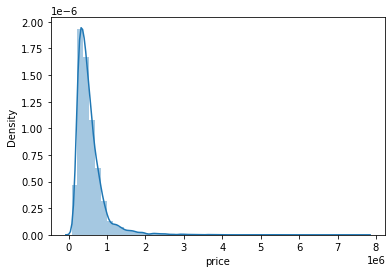

In [34]:
sns.distplot(df_raw['price'])

<AxesSubplot:xlabel='price', ylabel='error'>

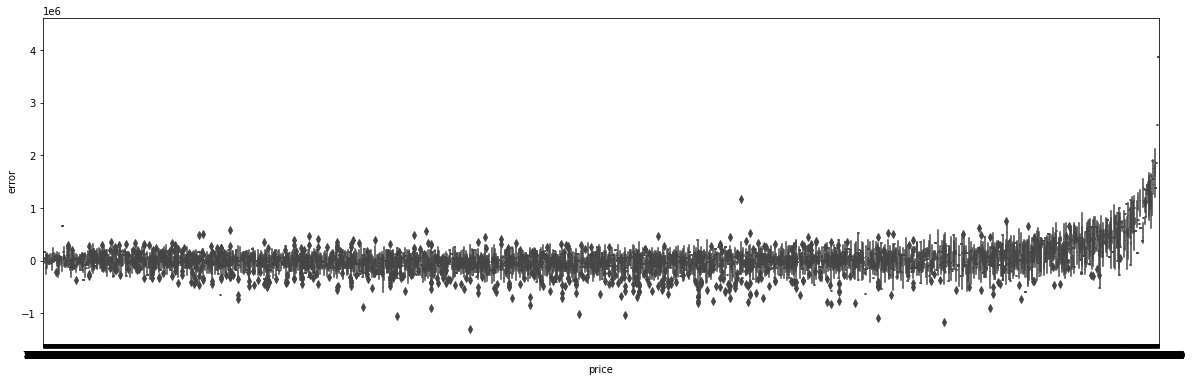

In [42]:
data = pd.concat([df_raw['price'], df1['error']], axis=1)
plt.figure(figsize=(20, 6))
sns.boxplot(x='price', y="error", data=data)